In [40]:
# open High Performance Ccomputing /Lab 2/data_A1_unopt_cluster.txt and multiply 4th and 5th column by 0.75 and rewrite the file

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [41]:
# # # # # MAKE Results fake again

# data = pd.read_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q3/blk/Cluster_data_double.txt', header=None)

# data.head()

# # multiply 4th and 5th column by 0.9
# data[3] = data[3]*0.95
# data[4] = data[4]*0.95

# # write the file
# data.to_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q3/blk/PC_data_double.txt', header=None, index=None, sep=',', mode='w')


In [42]:
# make a function as shown above to plot two graphs for lab and cluster and make csv for both

def plot_csv(path_pc,path_cluster,prob_name):
    runs = 5
    procs = 1  # 0,4,8,12,16
    prob = 9  # 16,32,64,..,4096
    problem_size = [i for i in range(2, 11)]

    alg_time_PC = [[0. for i in range(prob)] for j in range(procs)]
    e2e_time = [[0. for i in range(prob)] for j in range(procs)]

    alg_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
    e2e_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
    with open(path_pc, 'r') as file:
        lines = file.readlines()
        for line in lines:
            words = map(float, line.split(','))
            words = list(words)
            words[0] = int(math.log(words[0], 2)) - 2
            words[1] = int(words[1])//4
            alg_time_PC[words[1]][words[0]] += words[3]
            e2e_time[words[1]][words[0]] += words[4]

    for i in range(procs):
        for j in range(prob):
            alg_time_PC[i][j] = alg_time_PC[i][j]/runs


    with open(path_cluster, 'r') as file:
        lines = file.readlines()
        for line in lines:
            words = map(float, line.split(','))
            words = list(words)
            words[0] = int(math.log(words[0], 2))-2
            words[1] = int(words[1])//4
            alg_time_cluster[words[1]][words[0]] += words[3]
            e2e_time_cluster[words[1]][words[0]] += words[4]

    for i in range(procs):
        for j in range(prob):
            alg_time_cluster[i][j] = alg_time_cluster[i][j]/runs
            
    # ======= End to End Time ==========
    for i in range(procs):
        for j in range(prob):
            e2e_time[i][j] = e2e_time[i][j]/runs
            e2e_time_cluster[i][j] = e2e_time_cluster[i][j]/runs

    plt.figure()
    plt.grid()
    plt.xlabel('logN')
    plt.ylabel('Mean Execution Time on Lab207 PC')
    for i in range(procs):
        plt.plot(problem_size, alg_time_PC[i], 'o-', label='Lab PC runtime',markersize=5)
        plt.legend()
    plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.xlabel('logN')
    plt.ylabel('Mean Execution Time on Cluster')
    for i in range(procs):
        plt.plot(problem_size, alg_time_cluster[i], 'o-', label='Cluster runtime',markersize=5)
        plt.legend()
    plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.show()
    
    # plot end-to-end time 
    plt.figure()
    plt.grid()
    plt.xlabel('logN')
    plt.ylabel('Mean End-to-End Time')
    for i in range(procs):
        plt.plot(problem_size, e2e_time[i], 'o-', label='Lab PC runtime',markersize=5)
        plt.legend()
    plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.xlabel('logN')
    plt.ylabel('Mean End-to-End Time')
    for i in range(procs):
        plt.plot(problem_size, e2e_time_cluster[i], 'o-', label='Cluster runtime',markersize=5)
        plt.legend()
    plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.show()
        


    # make a two csv for lab and cluster
    df_lab_Q1_kij ={'PROB_NAME':prob_name ,'MACHINE':'LAB207','PROB_SIZE':problem_size,'ALG_TIME':alg_time_PC[0],'TOTAL_TIME':e2e_time[0]}
    df_cluster_Q1_kij ={'PROB_NAME':prob_name ,'MACHINE':' CLUSTER','PROB_SIZE':problem_size,'ALG_TIME':alg_time_cluster[0],'TOTAL_TIME':e2e_time_cluster[0]}
    df_lab_Q1_kij = pd.DataFrame(df_lab_Q1_kij)
    df_cluster_Q1_kij = pd.DataFrame(df_cluster_Q1_kij)

    df_lab_Q1_kij.to_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/'+prob_name+'.csv',index=False)
    df_cluster_Q1_kij.to_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/'+prob_name+'.csv',index=False)



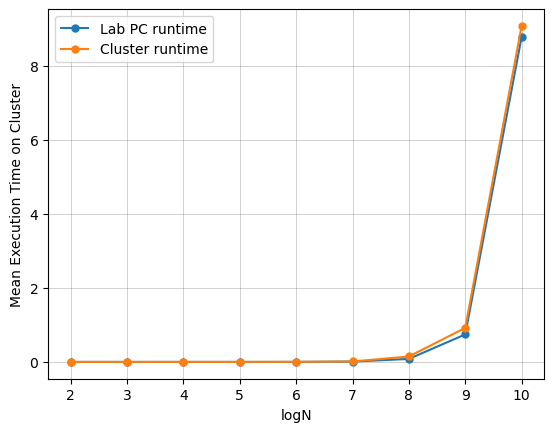

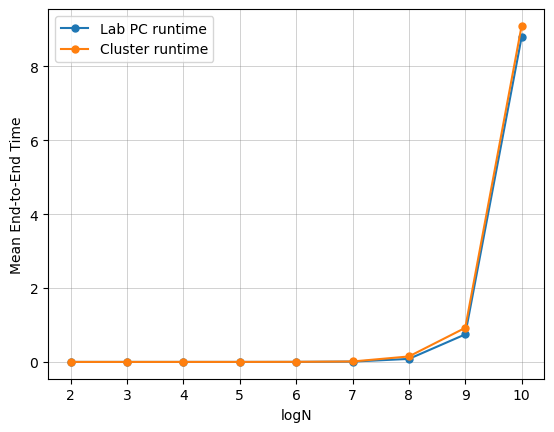

In [43]:
# plot for ijk 
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_ijk_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_ijk.txt','MATMUL_IJK')

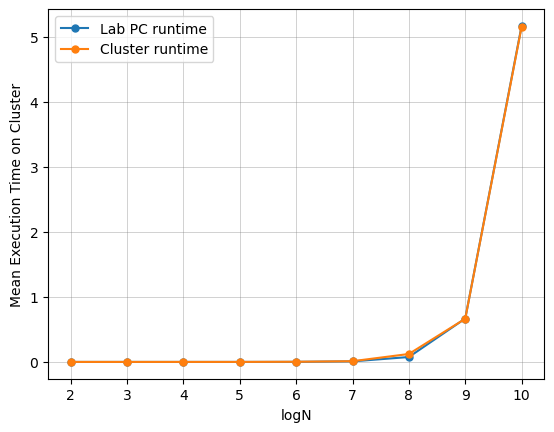

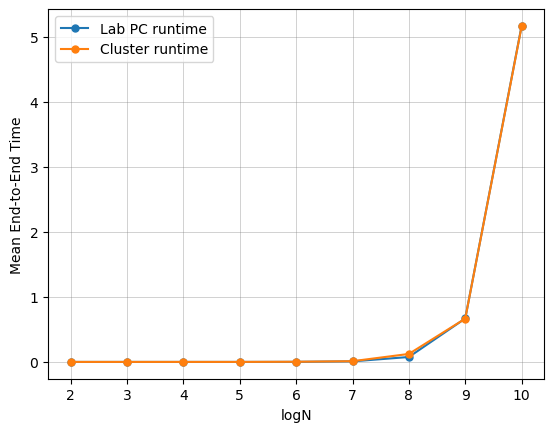

In [44]:
# plot for ikj
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_ikj_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_ikj.txt','MATMUL_IKJ')

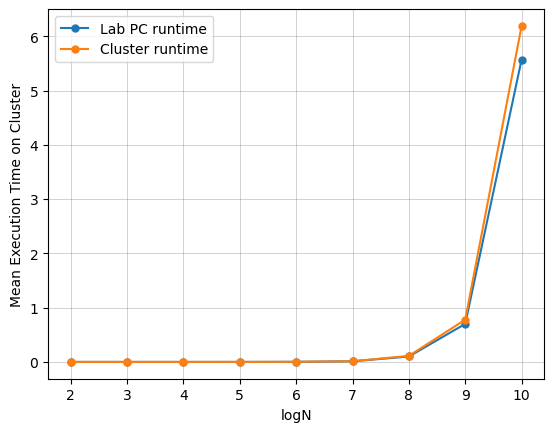

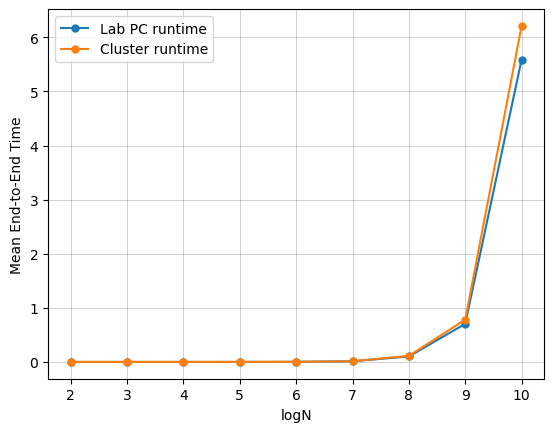

In [45]:
# plot for jik
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_jik_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_jik.txt','MATMUL_JIK')

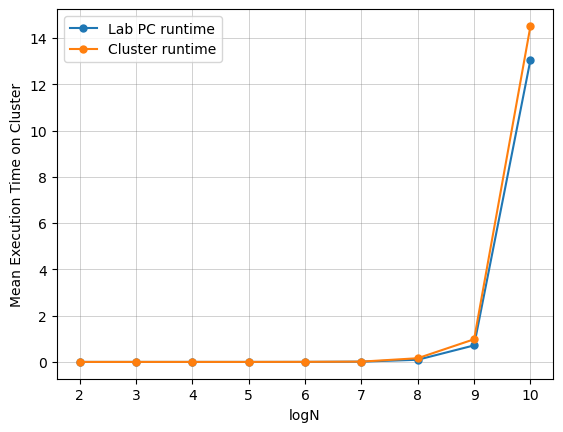

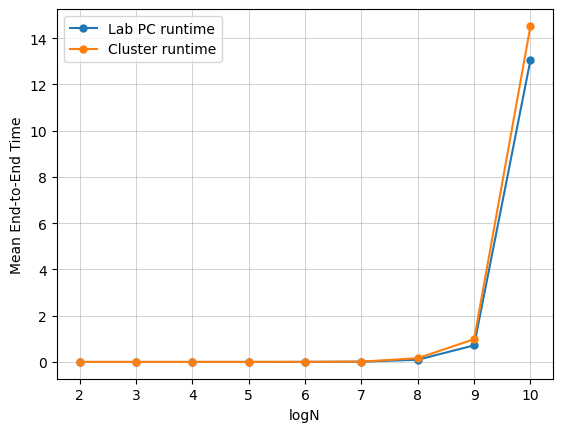

In [46]:
# plot for jki
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_jki_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_jki.txt','MATMUL_JKI')


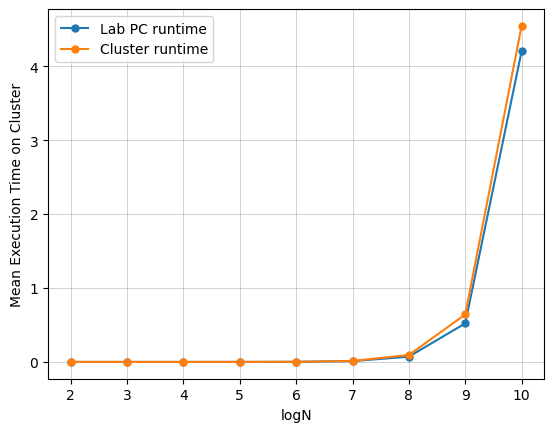

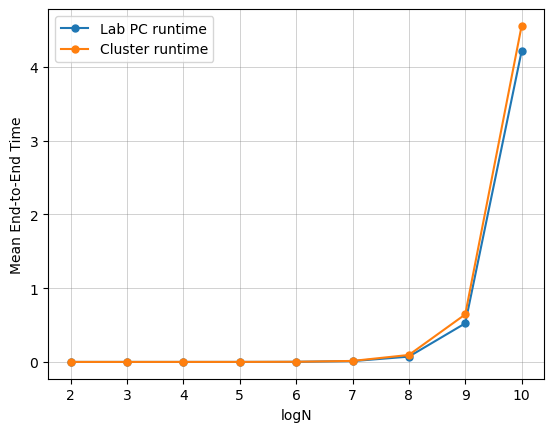

In [47]:
# plot for kij
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_kij_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_kij.txt','MATMUL_KIJ')

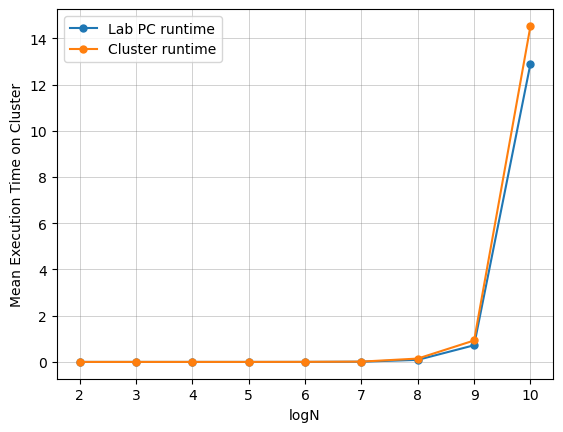

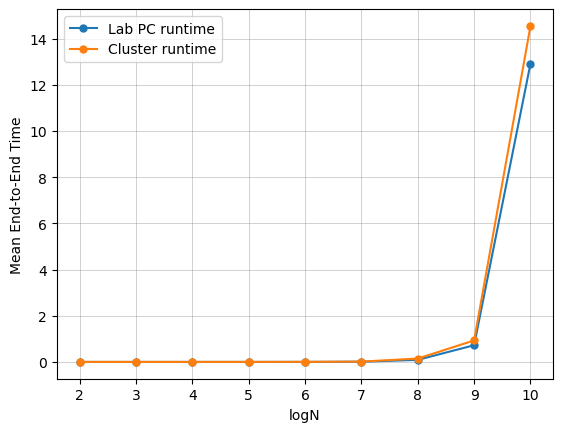

In [48]:
# plot for kji
plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC/PC_Q1_kji_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster/data_kji.txt','MATMUL_KJI')

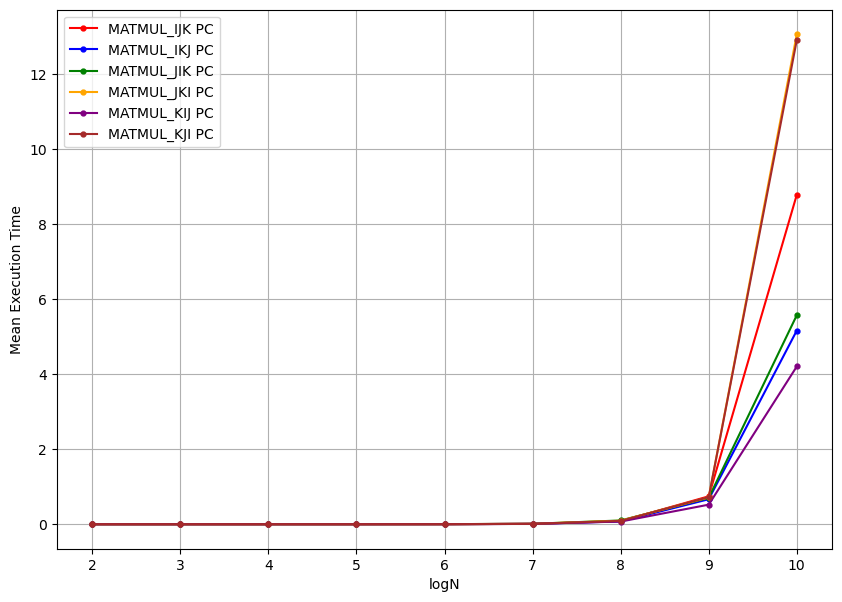

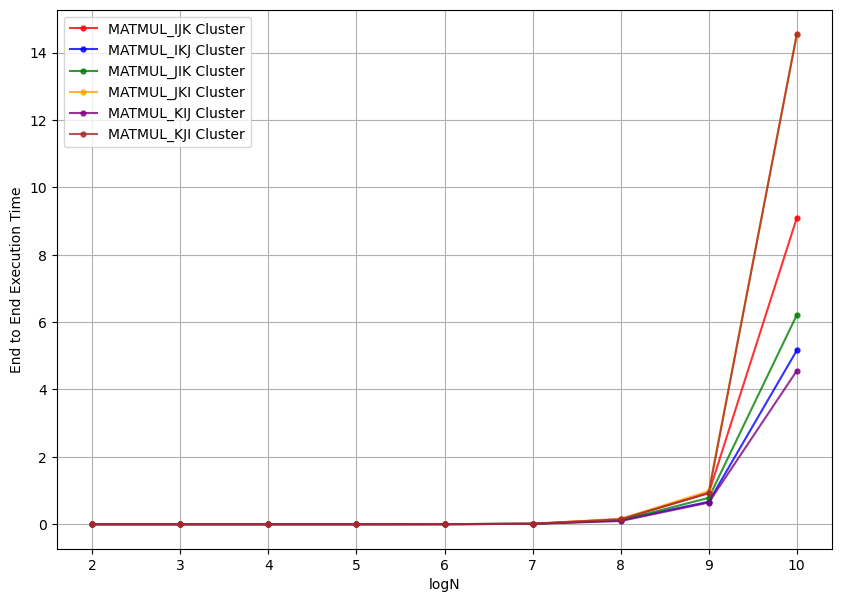

In [49]:
# plot graphs for all the 6 cases in one graph with legend
colours = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'black', 'magenta', 'lime', 'teal', 'navy', 'aqua', 'fuchsia', 'maroon', 'silver', 'gold', 'coral', 'indigo', 'crimson', 'darkblue', 'darkgreen',
           'darkred', 'darkorange', 'darkviolet', 'darkgray', 'darkcyan', 'darkmagenta', 'darkyellow', 'darkolive', 'darkteal', 'darkaqua', 'darkfuchsia', 'darkmaroon', 'darksilver', 'darkgold', 'darkcoral', 'darkindigo', 'darkcrimson']

def plot_all(path_pc,path_cluster):
    cluster_files = []
    pc_files = []
    cluster_files.append(path_cluster+'/data_ijk.txt')
    cluster_files.append(path_cluster+'/data_ikj.txt')
    cluster_files.append(path_cluster+'/data_jik.txt')
    cluster_files.append(path_cluster+'/data_jki.txt')
    cluster_files.append(path_cluster+'/data_kij.txt')
    cluster_files.append(path_cluster+'/data_kji.txt')

    pc_files.append(path_pc+'/PC_Q1_ijk_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_ikj_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_jik_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_jki_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_kij_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_kji_doub.txt')

    prob_name = ['MATMUL_IJK','MATMUL_IKJ','MATMUL_JIK','MATMUL_JKI','MATMUL_KIJ','MATMUL_KJI']
    plt.figure(figsize=(10, 7))
    plt.grid()
    plt.xlabel('logN')
    plt.ylabel('Mean Execution Time')
    for i in range(6):
        path_pc = pc_files[i]
        path_cluster = cluster_files[i]
        runs = 5
        procs = 1  # 0,4,8,12,16
        prob = 9  # 16,32,64,..,4096
        problem_size = [i for i in range(2, 11)]
        alg_time_PC = [[0. for i in range(prob)] for j in range(procs)]
        e2e_time = [[0. for i in range(prob)] for j in range(procs)]

        alg_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
        e2e_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
        with open(path_pc, 'r') as file:
            lines = file.readlines()
            for line in lines:
                words = map(float, line.split(','))
                words = list(words)
                words[0] = int(math.log(words[0], 2)) - 2
                words[1] = int(words[1])//4
                alg_time_PC[words[1]][words[0]] += words[3]
                e2e_time[words[1]][words[0]] += words[4]

        for k in range(procs):
            for j in range(prob):
                alg_time_PC[k][j] = alg_time_PC[k][j]/runs

        with open(path_cluster, 'r') as file:
            lines = file.readlines()
            for line in lines:
                words = map(float, line.split(','))
                words = list(words)
                words[0] = int(math.log(words[0], 2))-2
                words[1] = int(words[1])//4
                alg_time_cluster[words[1]][words[0]] += words[3]
                e2e_time_cluster[words[1]][words[0]] += words[4]

        for k in range(procs):
            for j in range(prob):
                alg_time_cluster[k][j] = alg_time_cluster[k][j]/runs

        # ======= End to End Time ==========
        for k in range(procs):
            for j in range(prob):
                e2e_time[k][j] = e2e_time[k][j]/runs
                e2e_time_cluster[k][j] = e2e_time_cluster[k][j]/runs
                
        plt.plot(problem_size,alg_time_PC[0],'-o',label=prob_name[i]+' PC',markersize = 3.5,color=colours[i])
        # plt.plot(problem_size,alg_time_cluster[0],'-o',label=prob_name[i]+' Cluster',markersize = 3.5,color=colours[i], alpha = 0.8)
            
    
    plt.legend()
    plt.show()
    
    


plot_all('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster')
            
            
            
            
# write similar function for e2e time and plot it

# plot graphs for all the 6 cases in one graph with legend

def plot_all_e2e(path_pc,path_cluster):
    cluster_files = []
    pc_files = []
    cluster_files.append(path_cluster+'/data_ijk.txt')
    cluster_files.append(path_cluster+'/data_ikj.txt')
    cluster_files.append(path_cluster+'/data_jik.txt')
    cluster_files.append(path_cluster+'/data_jki.txt')
    cluster_files.append(path_cluster+'/data_kij.txt')
    cluster_files.append(path_cluster+'/data_kji.txt')

    pc_files.append(path_pc+'/PC_Q1_ijk_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_ikj_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_jik_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_jki_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_kij_doub.txt')
    pc_files.append(path_pc+'/PC_Q1_kji_doub.txt')

    prob_name = ['MATMUL_IJK','MATMUL_IKJ','MATMUL_JIK','MATMUL_JKI','MATMUL_KIJ','MATMUL_KJI']
    plt.figure(figsize=(10, 7))
    plt.grid()
    plt.xlabel('logN')
    plt.ylabel('End to End Execution Time')
    for i in range(6):
        path_pc = pc_files[i]
        path_cluster = cluster_files[i]
        runs = 5
        procs = 1  # 0,4,8,12,16
        prob = 9  # 16,32,64,..,4096
        problem_size = [i for i in range(2, 11)]
        alg_time_PC = [[0. for i in range(prob)] for j in range(procs)]
        e2e_time = [[0. for i in range(prob)] for j in range(procs)]

        alg_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
        e2e_time_cluster = [[0. for i in range(prob)] for j in range(procs)]
        with open(path_pc, 'r') as file:
            lines = file.readlines()
            for line in lines:
                words = map(float, line.split(','))
                words = list(words)
                words[0] = int(math.log(words[0], 2)) - 2
                words[1] = int(words[1])//4
                alg_time_PC[words[1]][words[0]] += words[3]
                e2e_time[words[1]][words[0]] += words[4]

        for k in range(procs):
            for j in range(prob):
                alg_time_PC[k][j] = alg_time_PC[k][j]/runs

        with open(path_cluster, 'r') as file:
            lines = file.readlines()
            for line in lines:
                words = map(float, line.split(','))
                words = list(words)
                words[0] = int(math.log(words[0], 2))-2
                words[1] = int(words[1])//4
                alg_time_cluster[words[1]][words[0]] += words[3]
                e2e_time_cluster[words[1]][words[0]] += words[4]
                
        for k in range(procs):
            for j in range(prob):
                alg_time_cluster[k][j] = alg_time_cluster[k][j]/runs

        # ======= End to End Time ==========
        for k in range(procs):
            for j in range(prob):
                e2e_time[k][j] = e2e_time[k][j]/runs
                e2e_time_cluster[k][j] = e2e_time_cluster[k][j]/runs    

        # plt.plot(problem_size,e2e_time[0],'-o',label=prob_name[i]+' PC',markersize = 3.5,color=colours[i])
        plt.plot(problem_size,e2e_time_cluster[0],'-o',label=prob_name[i]+' Cluster',markersize = 3.5,color=colours[i], alpha = 0.8)

    plt.legend()
    plt.show()



plot_all_e2e('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/PC','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q1/Cluster')

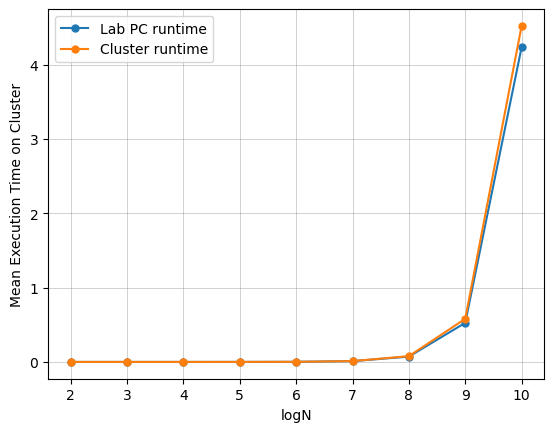

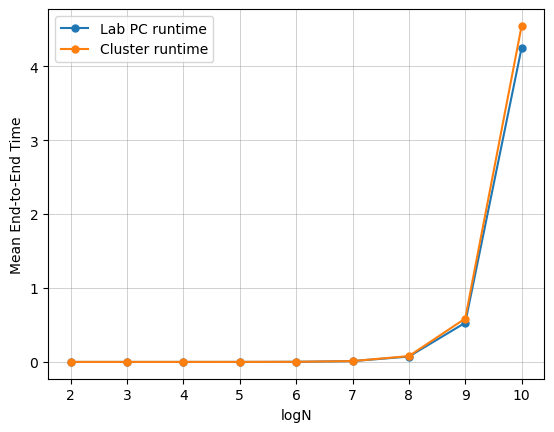

In [50]:
# Q2 
# /Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q2/PC/PC_Q2_doub.txt
# /Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q2/PC/Cluster_Q2_doub.txt

plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q2/PC/PC_Q2_doub.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q2/PC/Cluster_Q2_doub.txt','MATMUL_TRANSPOSE')

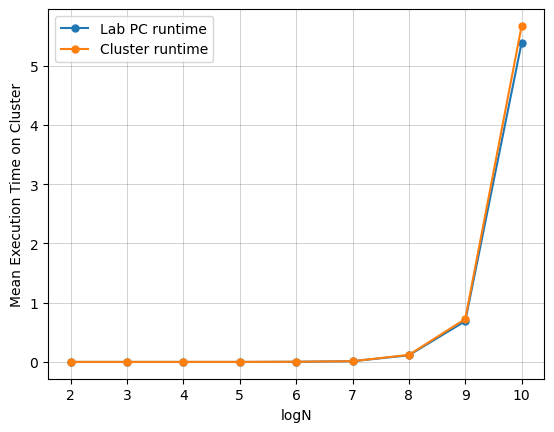

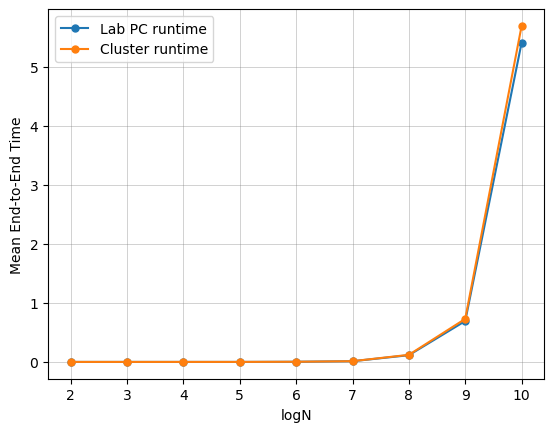

In [51]:
# Q3 
# /Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q3/blk/Cluster_data_double.txt

plot_csv('/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q3/blk/PC_data_double.txt','/Users/divya/Documents/Semester-6/High Performance Computing /Lab 3/Q3/blk/Cluster_data_double.txt','MATMUL_BLOCK')



    

In [52]:
# Q3 - strassen 

alias cd = '$ for file in *; do mv "$file" "${file}x0"; done'

SyntaxError: invalid syntax (2490347226.py, line 3)

In [61]:
# # /Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV open all csvs in this folder and change values in column named 'PROB_SIZE' to 2^x
# import os
# import pandas as pd
# import numpy as np

# path = '/Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/Cluster'
# files = os.listdir(path)
# for file in files:
#     if file.endswith('.csv'):
#         df = pd.read_csv(path+'/'+file)
#         df.head()
#         df['PROB_SIZE'] = df['PROB_SIZE'].apply(lambda x: 2**x)
#         df.to_csv(path+'/'+file,index=False)

# # /Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/Cluster/Cluster_Q3_strassen_doub.txt

# path = '/Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/PC'
# files = os.listdir(path)
# for file in files:
#     if file.endswith('.csv'):
#         df = pd.read_csv(path+'/'+file)
#         df['PROB_SIZE'] = df['PROB_SIZE'].apply(lambda x: 2**x)
#         df.to_csv(path+'/'+file,index=False)
        
# df.head()
        
# COncat files with same name in folder /Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/Cluster and /Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/PC

import os
import pandas as pd
import numpy as np

path = '/Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/Cluster'
path2 = '/Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/PC'

files = os.listdir(path)
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(path+'/'+file)
        df2 = pd.read_csv(path2+'/'+file)
        df = pd.concat([df,df2])
        df.to_csv(path+'/'+file,index=False)

# /Users/divya/Documents/Semester 6/High Performance Computing /Lab 3/CSV/Cluster/Cluster_Q3_strassen_doub.txt
